In [2]:
# Set up cell
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/raw/raw_data.csv")

Going to look into general trends and descriptive statistics regarding this data set. 

Some of the questions/topics I want to begin to investigate within this section:

1. How many crashes occurred in total, and how is this distributed by year or month? (Examine trends over time to identify whether crashes are increasing, decreasing, or remaining constant.)

2. Which months or seasons have the highest/lowest crash counts? (Look at crash distributions across months and seasons.)

3. What is the average number of crashes per day, week, or month?

4. Which days of the week have the most crashes? (Check whether weekends or weekdays are more accident-prone.)

## 1. How many crashes occurred in total, and how is this distributed by year or month? (Examine trends over time to identify whether crashes are increasing, decreasing, or remaining constant.) 

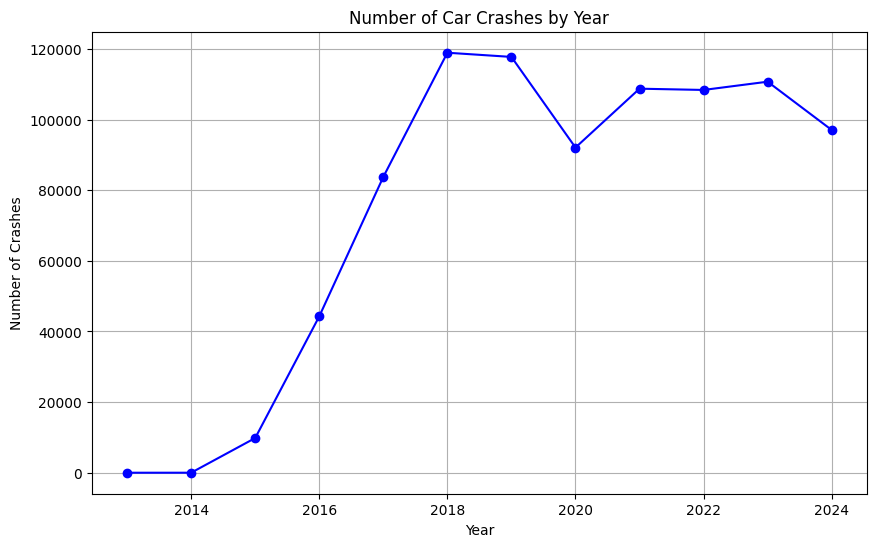

In [4]:
# Examine car crashes over time by year with a line graph
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

# Group by year and count the number of crashes
crashes_by_year = df.groupby('CRASH_YEAR').size()

# Plot the data
plt.figure(figsize=(10, 6))
crashes_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Number of Car Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

The above graph shows the number of car crashes by year. We can see a large increase in the number of crashes after 2015. This might not be extremely accurate however, since the graph is showing that the number of crashes in both 2013 and 2014 were both 0? Or a very small number. Let's dig a little further into these years to see what the data during this 2-year time span looks like.

In [8]:
# Return table of the number of crashes by year (only 2013 and 2014)
crashes_by_year = df_filtered1314.groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
crashes_by_year

,CRASH_YEAR,CRASH_COUNT
0,2013,2
1,2014,6


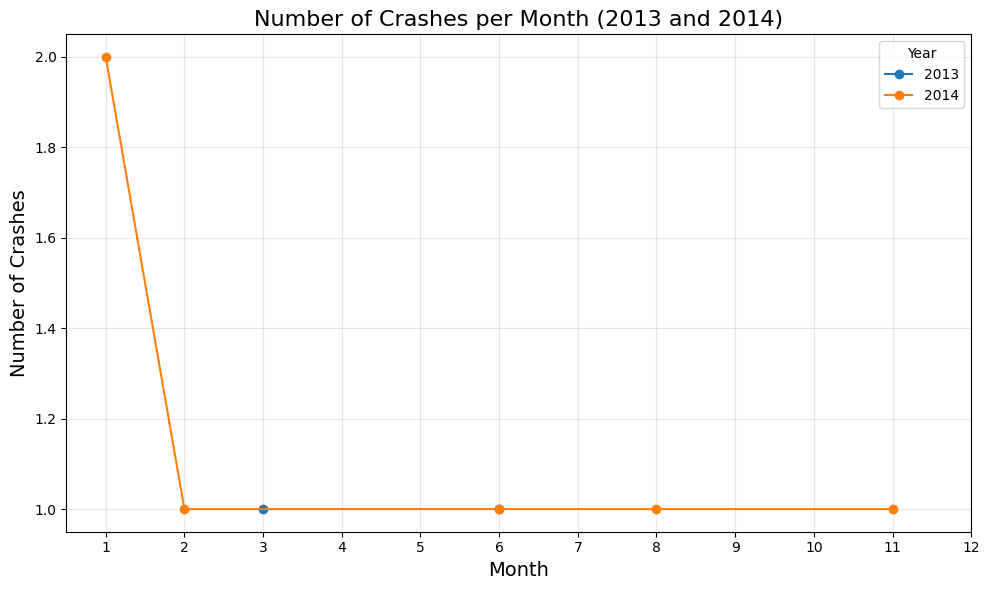

In [6]:
# Examine car crashes in 2013-2014 by month with a line graph
# Filter for 2013 and 2014
df_filtered1314 = df[df['CRASH_YEAR'].isin([2013, 2014])]

# Group by CRASH_YEAR and CRASH_MONTH to count crashes
crashes_per_month = df_filtered1314.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='CRASH_COUNT')

# Plotting
plt.figure(figsize=(10, 6))

# Loop through the filtered data and plot for each year
for year in [2013, 2014]:
    monthly_crashes = crashes_per_month[crashes_per_month['CRASH_YEAR'] == year]
    plt.plot(monthly_crashes['CRASH_MONTH'], monthly_crashes['CRASH_COUNT'], marker='o', label=f'{year}')

# Add labels, title, and legend
plt.title('Number of Crashes per Month (2013 and 2014)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(range(1, 13))  # Months 1 through 12
plt.legend(title='Year')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show plot
plt.show() #car crashes in 2013-2014 by month with a line graph


Seems like there is a discrepancy in the data reporting for years 2013 and 2014. Let's see what the numbers for 2015 look like before we nix these years from the data.

In [12]:
# Return 2x1 table of number of crashes in 2015
crashes_2015 = df[df['CRASH_YEAR'] == 2015].groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
crashes_2015

,CRASH_YEAR,CRASH_COUNT
0,2015,9830


In [14]:
# Return a table of the number of crashes by year, excluding 2013 and 2014
crashes_by_year = df[~df['CRASH_YEAR'].isin([2013, 2014])].groupby('CRASH_YEAR').size().reset_index(name='CRASH_COUNT')
crashes_by_year

,CRASH_YEAR,CRASH_COUNT
0,2015,9830
1,2016,44297
2,2017,83786
3,2018,118950
4,2019,117762
5,2020,92093
6,2021,108764
7,2022,108407
8,2023,110743
9,2024,97077


Compared with all of the other years, the numbers for 2015 also seem low. We are going to exclude the years 2013, 2014, and 2015 from all further analysis. 

Let's recreate the inital graph of number of crashes by year:

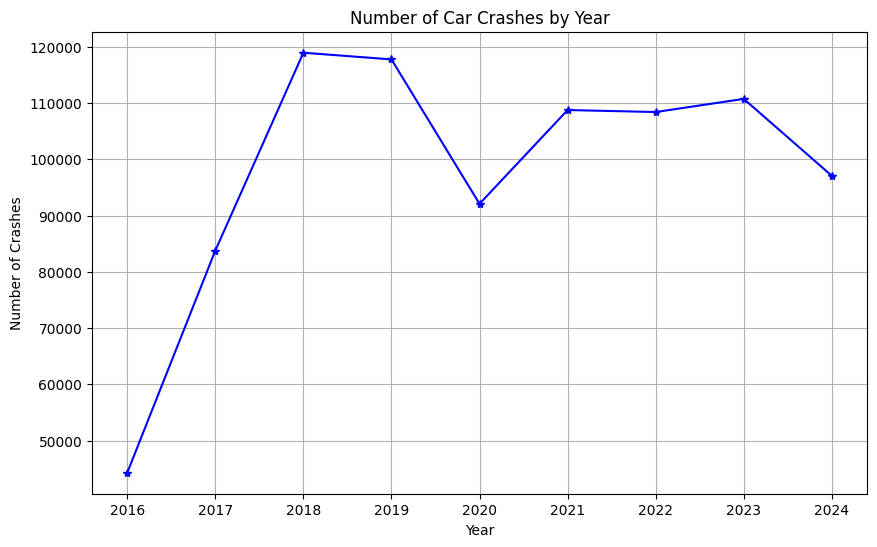

In [18]:
# Plot the data
crashes_by_year_excl = df[~df['CRASH_YEAR'].isin([2013, 2014, 2015])].groupby('CRASH_YEAR').size()

plt.figure(figsize=(10, 6))
crashes_by_year_excl.plot(kind='line', marker='*', color='blue')
plt.title('Number of Car Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

Now we know to only look at the data in the years 2016-2024. We will keep an eye on 2016, since the numbers are a little low. We may exclude it in the future as well. 

## 2. Which months or seasons have the highest/lowest crash counts? (Look at crash distributions across months and seasons.)

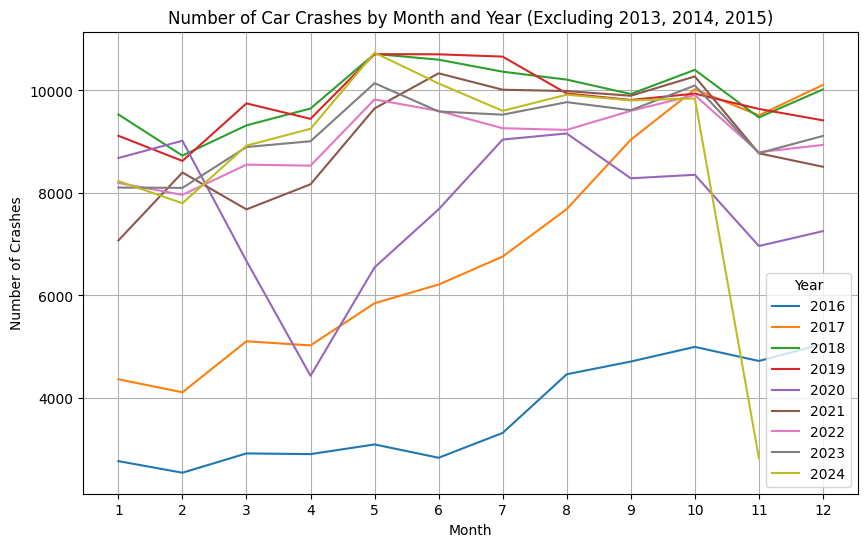

In [20]:
# Create a line graph of number of crashes by month, comparing the different lines by year

# Filter out the years 2013, 2014, and 2015
df_filtered = df[~df['CRASH_YEAR'].isin([2013, 2014, 2015])]

# Group by year and month, counting the number of crashes
monthly_crashes = df_filtered.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='crash_count')

# Pivot the data so each year is a column
monthly_crashes_pivot = monthly_crashes.pivot(index='CRASH_MONTH', columns='CRASH_YEAR', values='crash_count')

# Plot the data
plt.figure(figsize=(10,6))

# Plot each year as a separate line
for year in monthly_crashes_pivot.columns:
    plt.plot(monthly_crashes_pivot.index, monthly_crashes_pivot[year], label=str(year))

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.title('Number of Car Crashes by Month and Year (Excluding 2013, 2014, 2015)')
plt.xticks(monthly_crashes_pivot.index)  # Ensures all months are labeled
plt.legend(title="Year")
plt.grid(True)

# Show the plot
plt.show()
